In [80]:
# Реализация функции изименения температуры T с течением времени
def DecreaseTemperature(T0, i): 
    # Функция T ставит номеру итерации i в соответствие температуру
    # T0 - начальная температура
    # i - номер итерации
    T = T0 / (i + 1) # по Коши
    return T

# Вычесление вероятности P
def GetTransitionProbability(dE, T):
    P = np.exp(-dE / T)
    return P

# Есть отрезок [0, 1] и его поделили на 2 части. 
# Соответсвенно если число меньше P, то совершаем переход, в противном случае нет
def IsTransition(probability):
    if((probability > 1) or (probability < 0)):
        error('Violation of argument constraint')
        
    value = random.random() #  генерирует случайное число от 0.0 до 1.0
    if(value <= probability):
        a = 1
    else:
        a = 0
    
    return a

# Реализация функции F, которая порождает новое состояние
def GenerateStateCandidate(data1, data2):
    #seq - предыдущее состояние (маршрут), из которого 
    #мы хотим получить состояние-кандидат
    
    n = np.size(data1) # определяем размер последовательности
    i = random.randint(0, n - 1) # генерируем целое случайное число
    j = random.randint(0, n - 1) # генерируем целое случайное число
        
    if(i > j): 
        data1[j:i] = np.flip(data1[j:i]) # обращаем подпоследовательность по х
        data2[j:i] = np.flip(data2[j:i]) # обращаем подпоследовательность по y
    else:
        data1[i:j] = np.flip(data1[i:j]) # обращаем подпоследовательность по х
        data2[i:j] = np.flip(data2[i:j]) # обращаем подпоследовательность по y
    
    a = np.copy(data1)
    b = np.copy(data2)
    return(a, b)

# Используется в вычисление E
def Metric(x_1, x_2, y_1, y_2):
    distance = np.sqrt(((x_1 - x_2) ** 2) + ((y_1 - y_2) ** 2))
    return distance

# Вычисление энергии E
def CalculateEnergy(data1, data2):
    
    n = np.size(data1)
    E = 0
    for i in range(0, n - 1):
        E = E + Metric(data1[i + 1], data1[i], data2[i + 1], data2[i])
        
    E = E + Metric(data1[n - 1], data1[0], data2[n - 1], data2[0]) 
    return E

def SimulatedAnnealing(data1, data2, T0, T_end):
   
    currentEnergy = CalculateEnergy(data1, data2) # вычисляем энергию для первого состояния
    print("Начальная энергия: ")
    print(currentEnergy)
    T = T0
    Min_Energy = currentEnergy
    data1_min, data2_min = np.copy(data1), np.copy(data2)
    i = 1
    while(T > T_end):  # на всякий случай ограничеваем количество итераций
    # может быть полезно при тестировании сложных функций изменения температуры T       

        data1_state, data2_state = GenerateStateCandidate(data1, data2) # получаем состояние-кандидат
        candidateEnergy = CalculateEnergy(data1_state, data2_state) # вычисляем его энергию
        
        if(candidateEnergy < currentEnergy): # если кандидат обладает меньшей энергией
            currentEnergy = candidateEnergy # то оно становится текущим состоянием
            data1, data2 = np.copy(data1_state), np.copy(data2_state)
            if(candidateEnergy < Min_Energy): # наименьшую на данный момент энергию храним в Min_Energy
                Min_Energy = candidateEnergy
                data1_min, data2_min = np.copy(data1), np.copy(data2)
        else:
            p = GetTransitionProbability(candidateEnergy - currentEnergy, T) # иначе, считаем вероятность
            if (IsTransition(p) == 1): # и смотрим, осуществится ли переход
                currentEnergy = candidateEnergy
                data1, data2 = np.copy(data1_state), np.copy(data2_state)

        T = DecreaseTemperature(T0, i) # уменьшаем температуру
        i += 1
    
    #print(i)
    plt.subplots(figsize=(20, 10))
    plt.subplot(1,2, 1)
    plt.title("Граф в начальном состоянии")
    for i in range(array_len):
        plt.plot(coords_x[i:i+2], coords_y[i:i+2], 'ro-')
    plt.plot((coords_x[array_len-1], coords_x[0]), (coords_y[array_len-1], coords_y[0]), 'ro-')
        
    plt.subplot(1,2, 2)
    plt.title("Граф после применения алгоритма")
    for i in range(array_len):
        x, y = data1_min[i : i+2], data2_min[i : i+2]
        plt.plot(x, y, 'ro-')
    plt.plot((data1_min[array_len-1], data1_min[0]), (data2_min[array_len-1], data2_min[0]), 'ro-')
    
    plt.show()
    
    print("Энергия после применения алгоритма: ")
    return (Min_Energy)

Начальная энергия: 
495.71075588850056
10000


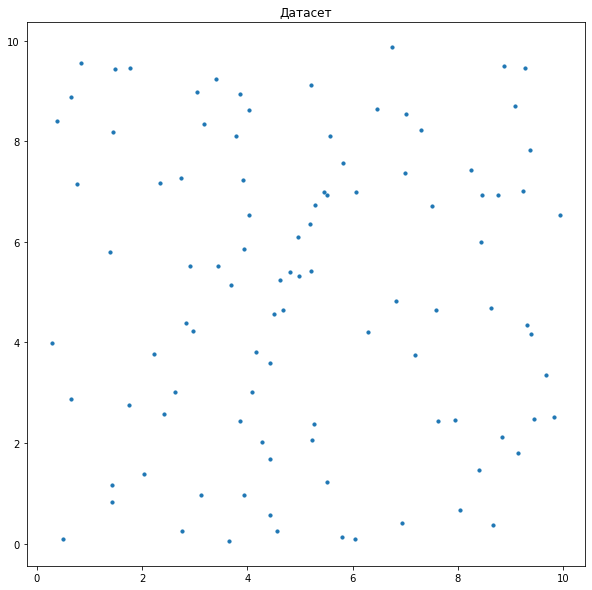

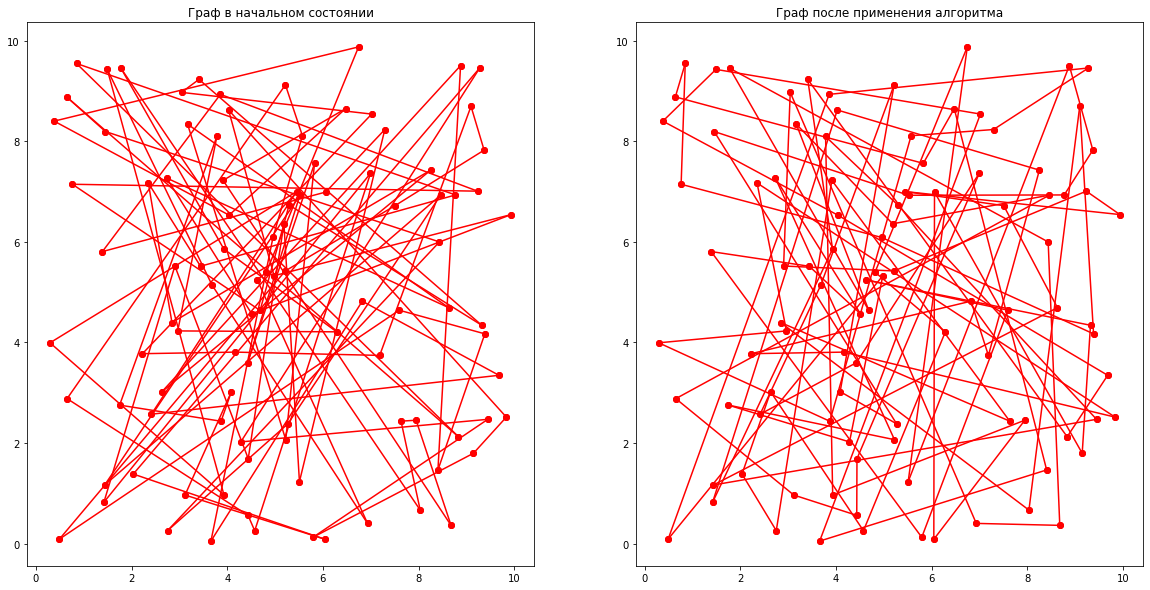

Энергия после применения алгоритма: 
445.7734762075381
Wall time: 4.65 s


In [81]:
%%time
import numpy as np
import random
import matplotlib.pyplot as plt 

# Задаем начальные минимальную и максимальную температуры
t_min = 0.001 # ЧЕМ БОЛЬШЕ НУЛЕЙ ТЕМ БОЛЬШЕ ИТЕРАЦИЙ. В ДАННОМ СЛУЧАЕ СЕЙЧАС СТОИТ 10000 ИТЕРАЦИЙ
t_max = 10

# Задаем датасет
array_len = 100 # КОЛЛИЧЕСТВО ТОЧЕК
a, b = 0, 10 # диапазон, можно задавать через input()
coords_x = np.zeros(array_len, dtype="float64")
coords_y = np.copy(coords_x)
for i in range(array_len):
    coords_x[i] = random.uniform(a,b)
    coords_y[i] = random.uniform(a,b)

#Визуализируем датасет
plt.figure(figsize = (10, 10))
plt.title("Датасет")
plt.scatter(coords_x, coords_y, 10)

print(SimulatedAnnealing(coords_x, coords_y, t_max, t_min))